<a href="https://colab.research.google.com/github/amilsiddik/Deep-Learning/blob/main/Sistem_Deteksi_Penyakit_Padi_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mengakses Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Menginstall package tensorflow-addons
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 6.8 MB/s 


In [3]:
# Import package
import os
import pathlib

import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import tensorflow as tf
import keras
import tensorflow_addons as tfa

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from scipy import interp
from itertools import cycle

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

We define each of labels directory:

In [4]:
# Direktori dataset
dir = '/content/drive/MyDrive/Percobaan/Dataset1/rice_leaf_diseases'

In [5]:
# Nama-nama kelas pada dataset
File=[]
for file in os.listdir(dir):
    File+=[file]
print(File)

['Brown spot', 'Leaf smut', 'Bacterial leaf blight']


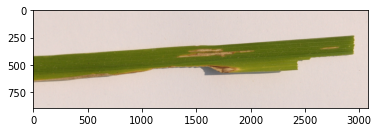

In [6]:
# Visualisasi citra asli
directory = "/content/drive/MyDrive/Percobaan/Dataset1/rice_leaf_diseases/Bacterial leaf blight/DSC_0365.JPG"
img = mpimg.imread(directory)
imgplot = plt.imshow(img)
plt.show()

#image = load_img(directory, grayscale=False, color_mode='rgb', target_size=(224,224))
#image = Image.open(r"/content/drive/MyDrive/rice_leaf_disease/Bacterial Leaf Blight/DSC_0365.JPG")
#image.show()
#plt.show()

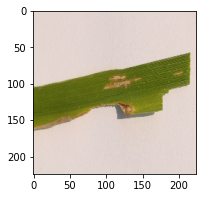

In [7]:
#img = Image.open(directory)
#img.thumbnail((224, 224))  # resizes image in-place

#Visualisasi citra yang diresize
img_resize = load_img(directory, grayscale=False, color_mode='rgb', target_size=(224,224))
plt.figure(figsize=(3,3))
imgplot = plt.imshow(img_resize)

In [8]:
# Mengubah gambar menjadi array
img_arr = img_to_array(img_resize)

In [9]:
# Menampilkan array
img_arr

array([[[230., 215., 210.],
        [227., 214., 208.],
        [226., 211., 208.],
        ...,
        [231., 216., 211.],
        [231., 216., 211.],
        [230., 217., 211.]],

       [[227., 214., 208.],
        [227., 214., 208.],
        [229., 214., 211.],
        ...,
        [230., 215., 210.],
        [228., 215., 209.],
        [231., 216., 211.]],

       [[228., 215., 209.],
        [228., 215., 209.],
        [230., 212., 208.],
        ...,
        [228., 215., 209.],
        [229., 216., 210.],
        [232., 214., 210.]],

       ...,

       [[229., 216., 210.],
        [228., 215., 207.],
        [228., 215., 209.],
        ...,
        [225., 214., 210.],
        [229., 216., 210.],
        [228., 215., 209.]],

       [[228., 215., 209.],
        [228., 213., 208.],
        [229., 216., 210.],
        ...,
        [225., 214., 210.],
        [229., 216., 210.],
        [228., 215., 209.]],

       [[227., 214., 208.],
        [229., 214., 211.],
        [229., 2

In [10]:
# Melakukan normalisasi
img_norm = img_arr/255.0

In [11]:
# Menampilkan array hasil normalisasi
img_norm

array([[[0.9019608 , 0.84313726, 0.8235294 ],
        [0.8901961 , 0.8392157 , 0.8156863 ],
        [0.8862745 , 0.827451  , 0.8156863 ],
        ...,
        [0.90588236, 0.84705883, 0.827451  ],
        [0.90588236, 0.84705883, 0.827451  ],
        [0.9019608 , 0.8509804 , 0.827451  ]],

       [[0.8901961 , 0.8392157 , 0.8156863 ],
        [0.8901961 , 0.8392157 , 0.8156863 ],
        [0.8980392 , 0.8392157 , 0.827451  ],
        ...,
        [0.9019608 , 0.84313726, 0.8235294 ],
        [0.89411765, 0.84313726, 0.81960785],
        [0.90588236, 0.84705883, 0.827451  ]],

       [[0.89411765, 0.84313726, 0.81960785],
        [0.89411765, 0.84313726, 0.81960785],
        [0.9019608 , 0.83137256, 0.8156863 ],
        ...,
        [0.89411765, 0.84313726, 0.81960785],
        [0.8980392 , 0.84705883, 0.8235294 ],
        [0.9098039 , 0.8392157 , 0.8235294 ]],

       ...,

       [[0.8980392 , 0.84705883, 0.8235294 ],
        [0.89411765, 0.84313726, 0.8117647 ],
        [0.89411765, 0

In [12]:
# Preprocessing data citra
dataset = []
mapping = {'Bacterial_Leaf_Blight':0, 'Brown_Spot':1, 'Leaf_Smut':2}
count = 0

for file in os.listdir(dir):
    path = os.path.join(dir,file)
    for im in os.listdir(path):
        image = load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(224,224))
        image = img_to_array(image)
        image = image/255.0
        dataset.append([image,count])     
    count=count+1

In [13]:
# Mengubah data menjadi array
data,labels0=zip(*dataset) 
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)
print(data.shape)
print(labels.shape)

(120, 224, 224, 3)
(120, 3)


In [ ]:
#from sklearn.model_selection import StratifiedKFold

#skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
#next(skf.split(data, labels0))
#next(skf.split(data, labels0))
#next(skf.split(data, labels0))
#train_index, test_index = next(skf.split(data, labels0))
#train_x, test_x = data[train_index], data[test_index]
#train_y, test_y = labels[train_index], labels[test_index]

In [14]:
# Pembagian data training dan testing
train_x,test_x,train_y,test_y=train_test_split(data,labels,test_size=0.2,random_state=13)

In [15]:
ter = np.argmax(test_y, axis=1)

In [16]:
np.unique(ter, return_counts=True)

(array([0, 1, 2]), array([8, 8, 8]))

In [17]:
len(train_x), len(test_x)

(96, 24)

In [18]:
# Menampilkan bentuk dimensi data training dan testing
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(96, 224, 224, 3)
(24, 224, 224, 3)
(96, 3)
(24, 3)


In [21]:
# Direktori masing-masing kelas
# Directory with our Bacterial Leaf Blight pictures
train_bacterial_dir = os.path.join('/content/drive/MyDrive/Percobaan/Dataset1/rice_leaf_diseases/Bacterial leaf blight')

# Directory with our Brown Spot pictures
train_brown_dir = os.path.join('/content/drive/MyDrive/Percobaan/Dataset1/rice_leaf_diseases/Brown spot')

# Directory with our Leaf Smut pictures
train_leaf_dir = os.path.join('/content/drive/MyDrive/Percobaan/Dataset1/rice_leaf_diseases/Leaf smut')

Now we see what the filenames look like in the `Bacteria Leaf Blight`, `Brown Spot` and `Leaf Smut` directories:

In [22]:
# Mengambil nama file masing-masing kelas
train_bacterial_names = os.listdir(train_bacterial_dir)
print("File names in Bacterial Leaf Blight directory:")
print(train_bacterial_names[:10])

train_brown_names = os.listdir(train_brown_dir)
print("\nFile names in Brown Spot directory:")
print(train_brown_names[:10])

train_leaf_names = os.listdir(train_leaf_dir)
print("\nFile names in Leaf Smut directory:")
print(train_leaf_names[:10])

File names in Bacterial Leaf Blight directory:
['DSC_0377.JPG', 'DSC_0378.JPG', 'DSC_0379.JPG', 'DSC_0365.JPG', 'DSC_0373.JPG', 'DSC_0374.JPG', 'DSC_0375.JPG', 'DSC_0376.JPG', 'DSC_0380.JPG', 'DSC_0382.JPG']

File names in Brown Spot directory:
['DSC_0300.JPG', 'DSC_0301.JPG', 'DSC_0299.JPG', 'DSC_0302.JPG', 'DSC_0332.JPG', 'DSC_0292.JPG', 'DSC_0295.JPG', 'DSC_0303.JPG', 'DSC_0304.JPG', 'DSC_0305.JPG']

File names in Leaf Smut directory:
['DSC_0508.jpg', 'DSC_0308.JPG', 'DSC_0309.JPG', 'DSC_0316.JPG', 'DSC_0327.JPG', 'DSC_0338.JPG', 'DSC_0331.JPG', 'DSC_0293.JPG', 'DSC_0310.JPG', 'DSC_0317.JPG']


We can also find out the total number of `Bacteria Leaf Blight`, `Brown Spot` and `Leaf Smut` images in the directories:

In [23]:
# Menampilkan jumlah citra pada masing-masing kelas
print('total Bacterial Leaf Blight images:', len(os.listdir(train_bacterial_dir)))
print('total Brown Spot images:', len(os.listdir(train_brown_dir)))
print('total Leaf Smut images:', len(os.listdir(train_leaf_dir)))

total Bacterial Leaf Blight images: 40
total Brown Spot images: 40
total Leaf Smut images: 40


# **Data Visualization**

Now we take a look at a few pictures to get a better sense of what they look like. First, configure the `matplotlib` parameters:

In [24]:
%matplotlib inline

# Parameters for our graph; we'll output images in a 3x3 configuration
nrows = 3
ncols = 3

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 each disease pictures. We can rerun the cell to see a fresh batch each time:

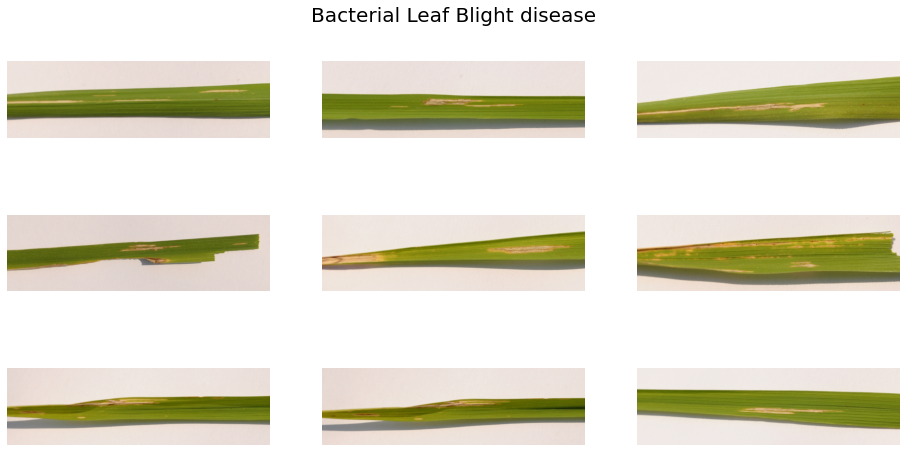

In [25]:
# Menampilkan 9 sampel citra kelas Bacterial Leaf Blight
# Set up matplotlib fig, and size it to fit 3x3 pics
fig = plt.gcf()
fig.set_size_inches(16, 8)

pic_index += 9
next_bacterial_pix = [os.path.join(train_bacterial_dir, fname) 
                for fname in train_bacterial_names[pic_index-9:pic_index]]

for i, img_path in enumerate(next_bacterial_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  if (i + 1 == 2):
    plt.title("Bacterial Leaf Blight disease", pad = 40, fontsize = 20)

plt.show()

In [26]:
pic_index = 0

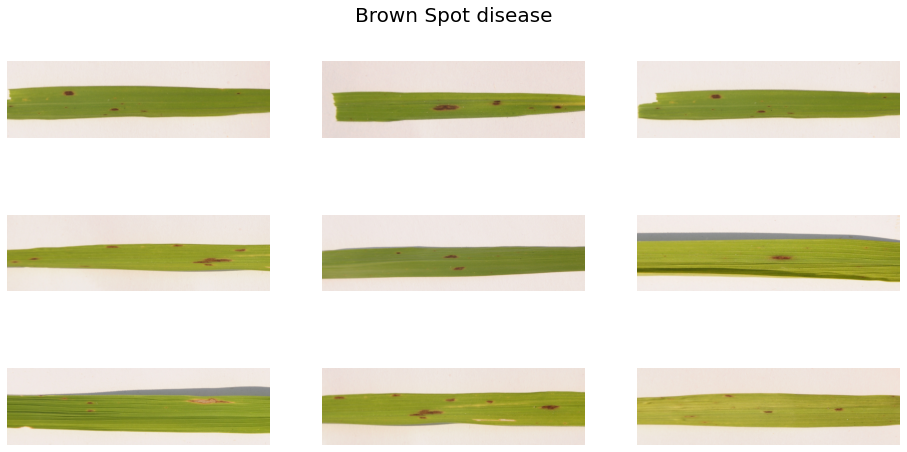

In [27]:
# Menampilkan 9 sampel citra kelas Brown Spot
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(16, 8)

pic_index += 9
next_brown_pix = [os.path.join(train_brown_dir, fname) 
                for fname in train_brown_names[pic_index-9:pic_index]]

for i, img_path in enumerate(next_brown_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  if (i + 1 == 2):
    plt.title("Brown Spot disease", pad = 40, fontsize = 20)

plt.show()

In [28]:
pic_index = 0

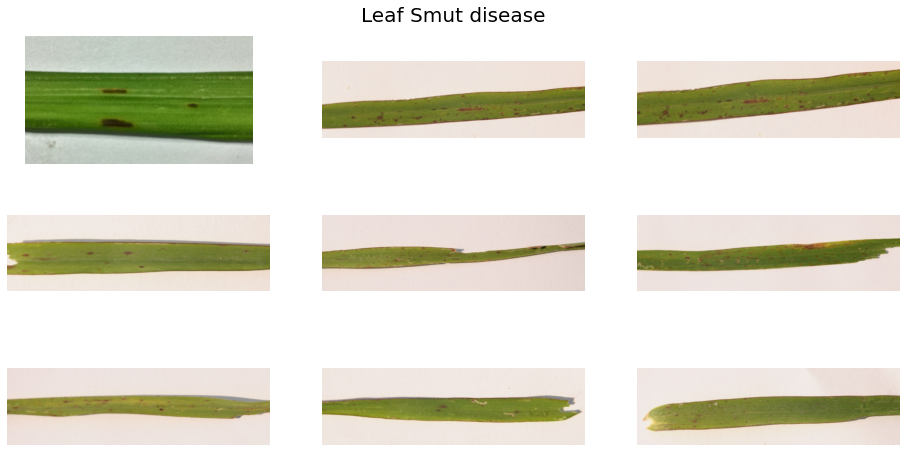

In [29]:
# Menampilkan 9 sampel citra kelas Leaf Smut
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(16, 8)

pic_index += 9
next_leaf_pix = [os.path.join(train_leaf_dir, fname) 
                for fname in train_leaf_names[pic_index-9:pic_index]]

for i, img_path in enumerate(next_leaf_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  if (i + 1 == 2):
    plt.title("Leaf Smut disease", pad = 40, fontsize = 20)

plt.show()

# **Data Augmentation**

We use ImageDataGenerator in TensorFlow to augment our data.

In [30]:
# Mengambil model MobileNetV2 dari TensorFlow Hub
module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


In [31]:
# Augmentasi data
datagen = ImageDataGenerator(
        horizontal_flip=True,
        vertical_flip=True,
        rotation_range=20,
        zoom_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.1,
        fill_mode="nearest")

In [32]:
print("\u2022 Using TensorFlow Hub Version: ", hub.__version__) 

• Using TensorFlow Hub Version:  0.12.0


In [33]:
do_fine_tuning = False #@param {type:"boolean"}



Load TFHub Module


In [34]:
# Membuat lapisan untuk MobileNetV2
feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE + (3,), 
                                   output_shape=[FV_SIZE],
                                   trainable=do_fine_tuning,
                                   name="MobileNetV2",)

# **Building Model**

Building the Transfer Learning Model using MobileNet_V2 in TensorFlowHub

In [35]:
# Membangun model akhir
print("Building model with", MODULE_HANDLE)

model = tf.keras.Sequential([
        feature_extractor,
        tf.keras.layers.Dense(256, activation='relu', name='Fully_Connected_Layer'),
        tf.keras.layers.Dropout(0.5, name='Dropout_Layer'),
        tf.keras.layers.Dense(3, activation='softmax', name='Output_Layer')
])

model.summary()

Building model with https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobileNetV2 (KerasLayer)    (None, 1280)              2257984   
                                                                 
 Fully_Connected_Layer (Dens  (None, 256)              327936    
 e)                                                              
                                                                 
 Dropout_Layer (Dropout)     (None, 256)               0         
                                                                 
 Output_Layer (Dense)        (None, 3)                 771       
                                                                 
Total params: 2,586,691
Trainable params: 328,707
Non-trainable params: 2,257,984
_________________________________________________________________


In [36]:
#@title (Optional) Unfreeze some layers
# Membekukan lapisan agar bobot tidak berubah
NUM_LAYERS = 10 #@param {type:"slider", min:1, max:50, step:1}
      
if do_fine_tuning:
    feature_extractor.trainable = True
    
    for layer in model.layers[-NUM_LAYERS:]:
        layer.trainable = True

else:
    feature_extractor.trainable = False

In [37]:
# Compile model
METRICS = [
      'accuracy',
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      tfa.metrics.F1Score(num_classes=3)
]

if do_fine_tuning:
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.002, momentum=0.9),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=METRICS)
else:
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=METRICS)

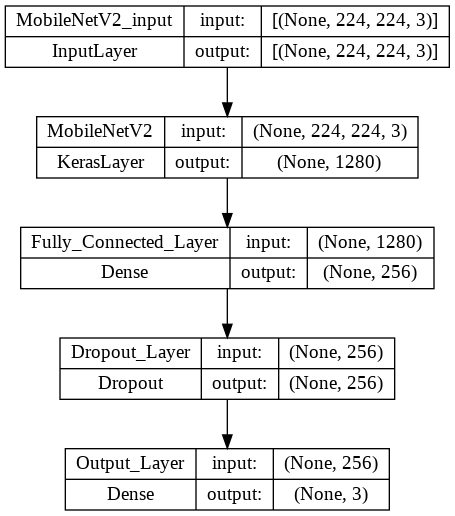

In [38]:
# plot the model including the sizes of the model
tf.keras.utils.plot_model(model, show_shapes=True)

# **Training and Testing Model**

In [39]:
# Train the model.
history = model.fit(
            datagen.flow(train_x, train_y, batch_size=8),
            validation_data = (test_x, test_y),
            epochs = 50)

Epoch 1/50
12/12 [==============================] - 14s 186ms/step - loss: 1.1682 - accuracy: 0.5729 - precision: 0.5814 - recall: 0.5208 - f1_score: 0.5712 - val_loss: 0.3550 - val_accuracy: 0.8750 - val_precision: 0.9130 - val_recall: 0.8750 - val_f1_score: 0.8775
Epoch 2/50
12/12 [==============================] - 1s 92ms/step - loss: 0.4581 - accuracy: 0.8229 - precision: 0.8587 - recall: 0.8229 - f1_score: 0.8234 - val_loss: 0.2403 - val_accuracy: 0.9167 - val_precision: 0.9167 - val_recall: 0.9167 - val_f1_score: 0.9153
Epoch 3/50
12/12 [==============================] - 1s 89ms/step - loss: 0.3550 - accuracy: 0.8542 - precision: 0.8632 - recall: 0.8542 - f1_score: 0.8519 - val_loss: 0.3637 - val_accuracy: 0.8750 - val_precision: 0.9130 - val_recall: 0.8750 - val_f1_score: 0.8664
Epoch 4/50
12/12 [==============================] - 1s 93ms/step - loss: 0.3539 - accuracy: 0.8646 - precision: 0.8723 - recall: 0.8542 - f1_score: 0.8639 - val_loss: 0.1921 - val_accuracy: 0.9583 - val_

In [40]:
# Menampilkan nilai presisi, recall, dan F1-score
pred = model.predict(test_x, verbose=2)
model_predicted = np.argmax(pred, axis = 1)

print(classification_report(test_y.argmax(axis=1), model_predicted, target_names=File))

1/1 - 1s - 1s/epoch - 1s/step
                       precision    recall  f1-score   support

           Brown spot       1.00      0.88      0.93         8
            Leaf smut       1.00      1.00      1.00         8
Bacterial leaf blight       0.89      1.00      0.94         8

             accuracy                           0.96        24
            macro avg       0.96      0.96      0.96        24
         weighted avg       0.96      0.96      0.96        24



In [41]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

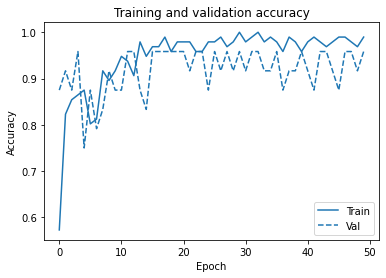

<Figure size 432x288 with 0 Axes>

In [42]:
# Menampilkan kurva akurasi
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']

epochs   = range(len(acc))

plt.plot(epochs, acc, color=colors[0], label='Train')
plt.plot(epochs, val_acc, color=colors[0], linestyle="--", label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

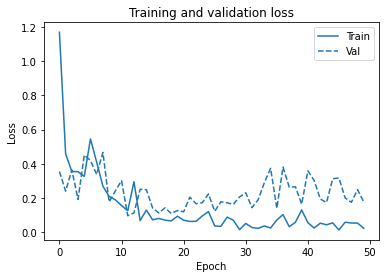

<Figure size 432x288 with 0 Axes>

In [43]:
loss      = history.history['loss']
val_loss  = history.history['val_loss']

epochs   = range(len(loss))

plt.plot(epochs, loss, color=colors[0], label='Train')
plt.plot(epochs, val_loss, color=colors[0], linestyle="--", label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

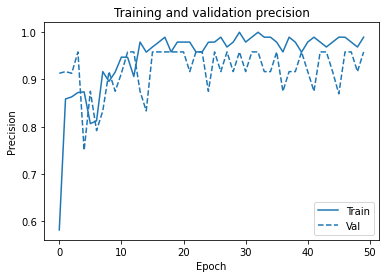

<Figure size 432x288 with 0 Axes>

In [44]:
precision      = history.history['precision']
val_precision  = history.history['val_precision']

epochs   = range(len(precision))

plt.plot(epochs, precision, color=colors[0], label='Train')
plt.plot(epochs, val_precision, color=colors[0], linestyle="--", label='Val')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Training and validation precision')
plt.legend(loc=0)
plt.figure()
plt.show()

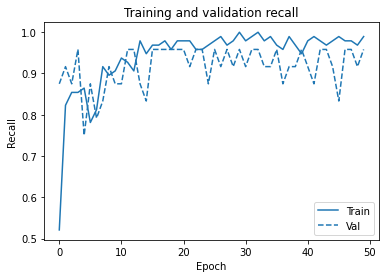

<Figure size 432x288 with 0 Axes>

In [45]:
recall      = history.history['recall']
val_recall  = history.history['val_recall']

epochs   = range(len(recall))

plt.plot(epochs, recall, color=colors[0], label='Train')
plt.plot(epochs, val_recall, color=colors[0], linestyle="--", label='Val')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Training and validation recall')
plt.legend(loc=0)
plt.figure()
plt.show()

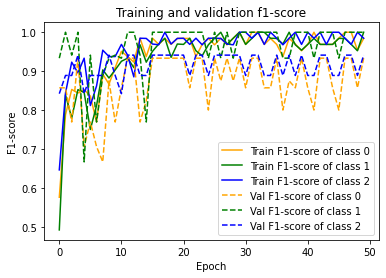

<Figure size 864x864 with 0 Axes>

In [46]:
# Menampilkan kurva F1-score untuk masing-masing kelas
f1_score = history.history['f1_score']
val_f1_score = history.history['val_f1_score']
f1_numpy = np.array(f1_score)
val_f1_numpy = np.array(val_f1_score)

epochs   = range(len(f1_score))

n_classes = 3
colors = cycle(['orange', 'green', 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(epochs, f1_numpy[:, i], color=color,
            label='Train F1-score of class {0}'.format(i))
for i, color in zip(range(n_classes), colors):
    plt.plot(epochs, val_f1_numpy[:, i], color=color,
            linestyle="--", 
            label='Val F1-score of class {0}'.format(i))

plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.title('Training and validation f1-score')
plt.legend(loc=0)
plt.figure(figsize=(12,12))
plt.show()

1/1 [==============================] - 0s 29ms/step


Text(0.5, 1.0, 'Confusion Matrix')

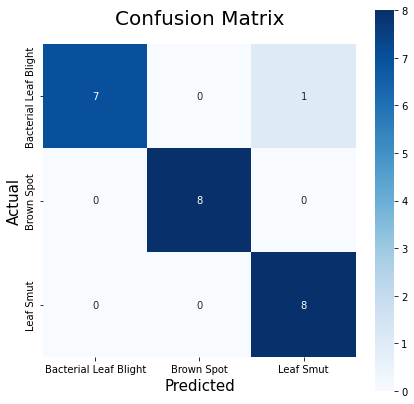

In [47]:
# Menampilkan Confusion Matrix
disease_types = ["Bacterial Leaf Blight", "Brown Spot", "Leaf Smut"]
Y_pred = model.predict(test_x)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(test_y, axis=1)

fig, ax = plt.subplots(figsize=(7,7))
cm = confusion_matrix(Y_true, Y_pred)
#plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, 
                 square=True, xticklabels=disease_types, 
                 yticklabels=disease_types, ax=ax)
ax.set_ylabel('Actual', fontsize=15)
ax.set_xlabel('Predicted', fontsize=15)
ax.set_title('Confusion Matrix', fontsize=20, pad=20)

In [48]:
# Menampilkan kurva AUC-ROC
Y_pred = model.predict(test_x)

1/1 [==============================] - 0s 29ms/step


In [49]:
n_classes = 3
lw = 2
Y_val = test_y
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_val[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_val.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


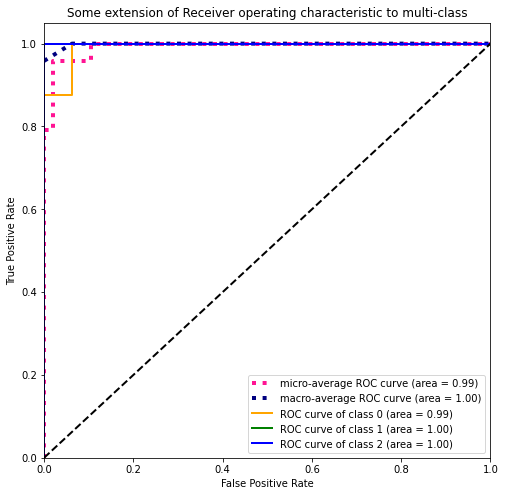

In [50]:
# Pertama-tama, gabungkan semua False Positive Rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Kemudian interpolasi semua kurva ROC pada titik ini
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Terakhir, rata-rata dan hitung AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot semua kurva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['orange', 'green', 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [51]:
def plot_metrics(history):
  metrics = ['accuracy', 'loss', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    fig = plt.gcf()
    fig.set_size_inches(12, 10)
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()


Text(0.5, 1.0, 'Training and validation loss')

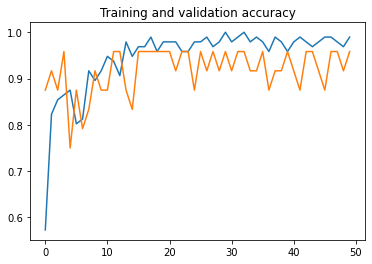

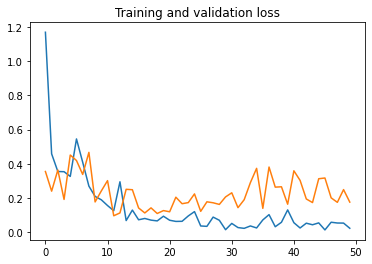

In [52]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy' ]
loss     = history.history['loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc )
plt.plot(epochs, val_acc )
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title('Training and validation loss')

**Generate a SavedModel**

In [53]:
# Save model
export_dir = 'content/saved_model/1'
tf.saved_model.save(model, export_dir)

**Convert the SavedModel to TFLite**

In [54]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

In [55]:
def format_image(image, label):
    image = tf.image.resize(image, IMAGE_SIZE) / 255.0
    return  image, label

In [56]:
data_dir = pathlib.Path("/content/drive/MyDrive/rice_leaf_diseases/validation")

In [57]:
batch_size = 1
img_height = 224
img_width = 224

In [ ]:
#test_ds = tf.keras.utils.image_dataset_from_directory(
 # data_dir,
  #seed=123,
  #image_size=(img_height, img_width),
  #batch_size=batch_size)

In [ ]:
#for image_batch, labels_batch in test_ds:
 # print(image_batch.shape)
  #print(labels_batch.shape)
  #break

In [ ]:
#test_batches = test_ds.map(format_image).batch(1)

**Post-Training Integer Quantization**

In [ ]:
#def representative_data_gen():
 #   for input_value, _ in test_batches.take(20):
  #      yield [input_value]

In [ ]:
#validation_dir = os.path.join('/content/drive/MyDrive/rice_leaf_diseases/validation')
#test_datagen = ImageDataGenerator(rescale=1./255)

#validation_generator = test_datagen.flow_from_directory(
 #       validation_dir,
  #      target_size=(pixels, pixels),
   #     batch_size=1,
    #    class_mode='categorical')

In [ ]:
#converter.representative_dataset = validation_generator

**Post-Training Quantization**

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

**Full Integer Quantization**

In [ ]:
#converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

**Finally convert the model**

In [ ]:
tflite_model = converter.convert()
tflite_model_file = '/content/model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [ ]:
try:
    from google.colab import files
    files.download('/content/converted_model.tflite')
except:
    pass